# PIVOT

La función *.pivot()* nos permite redefinit una tabala en base a la repetición de sus valores.

In [29]:
import pandas as pd
import numpy as np

In [43]:
datos={
    "nombre":["María","Carlos","Juan"]*4,
    "medida":["Peso"]*3+["Altura"]*3+["Promedio"]*3+["Asistencia"]*3,
    "2020": [30,35,36,1.5,1.7,1.8,7,7,9,50,51,47],
    "2021": [30,34,37,1.5,1.7,1.8,7,8,8,53,52,50],
    "2022": [32,36,36,1.5,1.7,1.8,8,7,7,52,52,51]
}
datos
df=pd.DataFrame(datos)
df

,nombre,medida,2020,2021,2022
0,María,Peso,30.0,30.0,32.0
1,Carlos,Peso,35.0,34.0,36.0
2,Juan,Peso,36.0,37.0,36.0
3,María,Altura,1.5,1.5,1.5
4,Carlos,Altura,1.7,1.7,1.7
5,Juan,Altura,1.8,1.8,1.8
6,María,Promedio,7.0,7.0,8.0
7,Carlos,Promedio,7.0,8.0,7.0
8,Juan,Promedio,9.0,8.0,7.0
9,María,Asistencia,50.0,53.0,52.0


La función toma como argumentos los valores que serán índices, las columnas, y los valores a colocar.

In [51]:
df.pivot(index="nombre",columns="medida",values="2021")

medida,Altura,Asistencia,Peso,Promedio
nombre,,,,
Carlos,1.7,52.0,34.0,8.0
Juan,1.8,50.0,37.0,8.0
María,1.5,53.0,30.0,7.0


También se pueden agregar varias columnas en values, para que sean comparadas.

In [54]:
df.pivot(index="nombre",columns="medida",values=["2020","2022"])

2020                             2022                          
medida Altura Asistencia  Peso Promedio Altura Asistencia  Peso Promedio
nombre                                                                  
Carlos    1.7       51.0  35.0      7.0    1.7       52.0  36.0      7.0
Juan      1.8       47.0  36.0      9.0    1.8       51.0  36.0      7.0
María     1.5       50.0  30.0      7.0    1.5       52.0  32.0      8.0

### .pivos_table()
* Similar a *.pivot()* pero agregar la funcion agregadora posibilitando la inseción del parametro aggfunc()

In [83]:
ttn=pd.read_csv('./titanic.csv')
# Inexado por Clase, se toman las edades maximas minimas y medias de Hombres y Mujeres
ttn.pivot_table(index='Pclass',columns='Sex',values='Age',aggfunc=['max','mean','min'])

max             mean               min      
Sex    female  male     female       male female  male
Pclass                                                
1        63.0  80.0  34.611765  41.281386   2.00  0.92
2        57.0  70.0  28.722973  30.740707   2.00  0.67
3        63.0  74.0  21.750000  26.507589   0.75  0.42

In [85]:
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Distintas funciones para distintas columnas

In [89]:
# Indexa por el sexo, usa las clases como clumnas y calcula maximo, minimo y media de las edades, y cuenta los sobrevivientes.
ttn.pivot_table(index='Sex',columns='Pclass',values=['Age','Survived'],aggfunc={'Age':['max','mean','min'],'Survived':'count'})

Age                                                                 \
         max                   mean                         min               
Pclass     1     2     3          1          2          3     1     2     3   
Sex                                                                           
female  63.0  57.0  63.0  34.611765  28.722973  21.750000  2.00  2.00  0.75   
male    80.0  70.0  74.0  41.281386  30.740707  26.507589  0.92  0.67  0.42   

       Survived            
          count            
Pclass        1    2    3  
Sex                        
female       94   76  144  
male        122  108  347

# Series Temporales

* Es una suceción de datos ordenados cronológicamente


### Time Stamps

Definición explisita de una valor Time Stamp en panda

In [4]:
pd.Timestamp(year=2022, month=10, day=15, hour=15, minute=24, second=18)

Timestamp('2022-10-15 15:24:18')

Definición implísita, se colocan los valores en orden, año, mes, día, hora, minutos, segundos

In [5]:
pd.Timestamp(2022,10,15,15,24,18)

Timestamp('2022-10-15 15:24:18')

Definición con el formato estandar

In [6]:
pd.Timestamp('2022/10/15 15:24:18')

Timestamp('2022-10-15 15:24:18')

Extraer un dato de la fecha con métodos:
* segundo .second
* minuto .minute
* hora .hour
* dia .day
* mes .month
* año .year

In [7]:
ts=pd.Timestamp('2022/10/15 15:24:18')
ts.minute

24

### Period
* Define un rango de tiempo, un *período*, mientras que **timestamp** es un *momento*
* .period('YYYY/MM/DD') define un período de 24 horas desde las 0:00:00 hasta las 23:59:59.99999 de ese día
* se accede a sus límites con .start_time() y .end_time()

In [9]:
per=pd.Period('2024/06/06')
print(per.start_time)
print(per.end_time)
print(per.start_time < pd.Timestamp('2024/06/06 08:35:15') < per.end_time)
print(per.start_time < pd.Timestamp('2024/06/08 08:35:15') < per.end_time)

2024-06-06 00:00:00
2024-06-06 23:59:59.999999999
True
False


* .period() genera lapsos de tiempos de mayo resolución posible y se puede operar, sumar o restar
* al definir un período, entre paréntesis luego de la fecha devuelve la granulidad siendo:
    * A-DEC para año
    * M para mes
    * D para día
    * H para hora
    * T para minuto
    * S para segundo
    * L para milesima de segundo
    * U para millonésima de segundo
    * N para nanosegundos


In [9]:
pd.Period('2021/02/15 01')

Period('2021-02-15 01:00', 'H')

### Formato indice
* Convertir indice de fechas de distintos formatos a un íncide de fechas con formato único

In [10]:
fechas = ['jun 30, 2020','15/10/2023','21 October 2022','2021-04-28','8/02/22']
datos =  pd.DataFrame(data=['dato1','dato2','dato3','dato4','dato5'], index=fechas, columns=['datos'])
datos

,datos
"jun 30, 2020",dato1
15/10/2023,dato2
21 October 2022,dato3
2021-04-28,dato4
8/02/22,dato5


In [11]:
datos.index

Index(['jun 30, 2020', '15/10/2023', '21 October 2022', '2021-04-28',
       '8/02/22'],
      dtype='object')

In [12]:
datos.index=pd.to_datetime(datos.index, format='mixed')
datos

,datos
2020-06-30,dato1
2023-10-15,dato2
2022-10-21,dato3
2021-04-28,dato4
2022-08-02,dato5


In [13]:
datos.index

DatetimeIndex(['2020-06-30', '2023-10-15', '2022-10-21', '2021-04-28',
               '2022-08-02'],
              dtype='datetime64[ns]', freq=None)

### Time Delta
* Operaciones con tiempos
    * .Timestamp() - .Timestamp() : Diferencia de días
    * .Timestamp() +/- .Timedelta()

In [14]:
pd.Timestamp('2024/06/15')-pd.Timestamp('2024/06/10')

Timedelta('5 days 00:00:00')

In [12]:
pd.Timestamp('2024/01/01')+pd.Timedelta('2D 18:30:00H')

Timestamp('2024-01-03 18:30:00')

In [13]:
pd.Timestamp('2024/01/01')-pd.Timedelta('2D 18:30:00H')

Timestamp('2023-12-29 05:30:00')

### Generar dataframes con rango de fechas
* Generar lista de fechas partiendo de un momento, cantidad de períodos y granulado.
* El granulado determina los cortes de períodos.
* pd.date_range('*fecha*', periods=*p*, freq=*g*).

In [16]:
ran_m = pd.date_range('2024/01/25', periods=5, freq="M") # cada fin de mes
ran_d = pd.date_range('2024/01/25', periods=5, freq="D") # cada 24 horas
ran_h = pd.date_range('2024/01/25', periods=5, freq="H") # cada 59 minutos
ran_lv =  pd.date_range('2024/01/25', periods=5, freq="B") # de lunes a viernes
print(ran_m)
print(ran_d)
print(ran_h)
print(ran_lv)

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-01-25 00:00:00', '2024-01-25 01:00:00',
               '2024-01-25 02:00:00', '2024-01-25 03:00:00',
               '2024-01-25 04:00:00'],
              dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30',
               '2024-01-31'],
              dtype='datetime64[ns]', freq='B')


In [18]:
# Cargar los datos, primer columna como índice, y parse_date, convierte los datos del índice en TimeStamp para ser tratado como fecha y hora
aq= pd.read_csv("./aq-Time.csv", index_col=0, parse_dates=True)
aq.head()

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [28]:
print(aq.loc[:,('station_1','station_3')].to_string())

                     station_1  station_3
datetime                                 
2019-05-07 02:00:00        NaN       23.0
2019-05-07 03:00:00       50.5       19.0
2019-05-07 04:00:00       45.0       19.0
2019-05-07 05:00:00        NaN       16.0
2019-05-07 06:00:00        NaN        NaN
2019-05-07 07:00:00        NaN       26.0
2019-05-07 08:00:00        NaN       32.0
2019-05-07 09:00:00        NaN       32.0
2019-05-07 10:00:00        NaN       28.0
2019-05-07 11:00:00        NaN       21.0
2019-05-07 12:00:00        NaN       21.0
2019-05-07 13:00:00        NaN       18.0
2019-05-07 14:00:00        NaN       20.0
2019-05-07 15:00:00        NaN       18.0
2019-05-07 16:00:00        NaN       20.0
2019-05-07 17:00:00        NaN       20.0
2019-05-07 18:00:00        NaN       21.0
2019-05-07 19:00:00        NaN       20.0
2019-05-07 20:00:00        NaN       20.0
2019-05-07 21:00:00        NaN       24.0
2019-05-07 22:00:00        NaN       24.0
2019-05-07 23:00:00        NaN    

In [18]:
aq.describe()

,station_1,station_2,station_3
count,95.000000,1004.000000,969.000000
mean,25.778947,27.740538,24.777090
std,12.682019,15.285746,11.214377
min,7.500000,0.000000,0.000000
25%,16.750000,16.500000,19.000000
50%,23.000000,24.150000,25.000000
75%,34.500000,35.925000,31.000000
max,74.500000,97.000000,97.000000


In [19]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station_1  95 non-null     float64
 1   station_2  1004 non-null   float64
 2   station_3  969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


Se puede ver que en el archvo existen varios registros del mismo día a distintas horas, la serie temporal de Pandas, permite "agrupar" por unidad de tiempo y obtener un promedio de todas las mediciones desde las 00:00:00 hasta las 23:59:59<br>
La funcion .resample() se utiliza para agrupar por unidad de tiempo en una serie temporal se puede urilizar:
* 'y' para años
* 'm' para meses
* 'd' para días
* 'h' para horas

In [20]:
aq.resample('d').mean().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,47.75,33.900000,22.100000
2019-05-08,21.75,25.529167,26.478261
2019-05-09,20.25,27.837500,43.173913
2019-05-10,11.00,32.950000,34.625000
2019-05-11,23.75,26.804762,30.842105


* Se obtiene los maximos por mes

In [21]:
aq.resample('m').max()

,station_1,station_2,station_3
datetime,,,
2019-05-31,74.5,97.0,97.0
2019-06-30,52.5,84.7,52.0


# Visualización de datos


Matplotlib es la librería que permite graficar información de un Data Frame, luego de ser importada se ejecuta con .plot()
* https://matplotlib.org/

In [22]:
import matplotlib.pyplot as plt

<Axes: xlabel='datetime'>

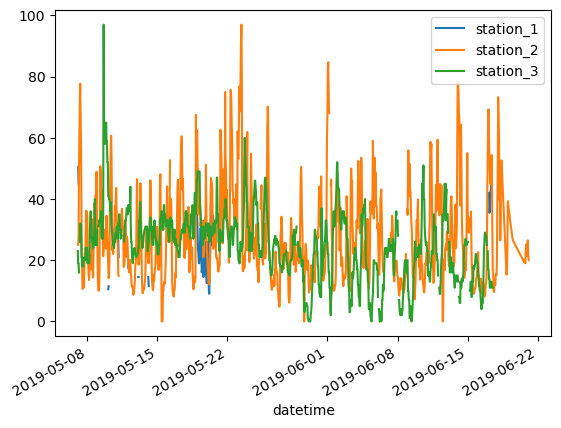

In [23]:
# Todo el contenido  del Data Frame
aq.plot()

<Axes: xlabel='datetime'>

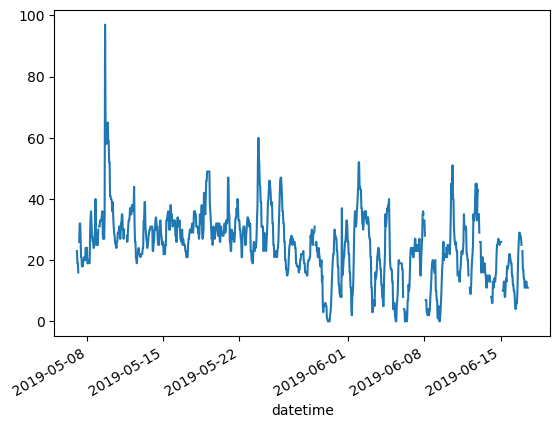

In [24]:
# Solo una serie o columna
aq['station_3'].plot()

### Tamaño de los gráficos
* fig, ax = plt.subplots(figsize(n,m)), donde n es el ancho y m el alto

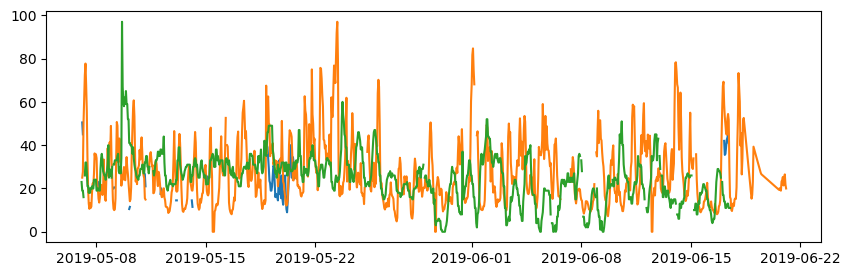

In [40]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(aq)
plt.show()

* También puede utilizarse .plot(figsize=(n,m))

<Axes: xlabel='datetime'>

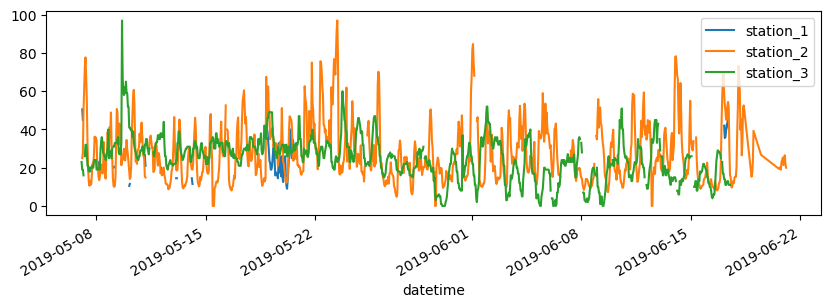

In [ ]:
aq.plot(figsize=(10,3))

* Para separar en distintos gráficos se agrega ,subplots=True, por defecto está en False

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

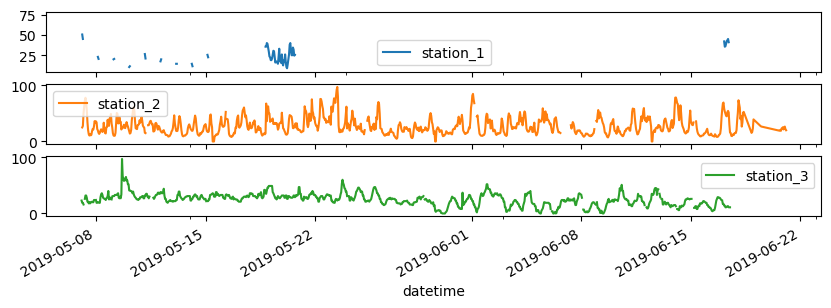

In [ ]:
aq.plot(figsize=(10,3), subplots=True)

* Grafico de Areas

<Axes: xlabel='datetime'>

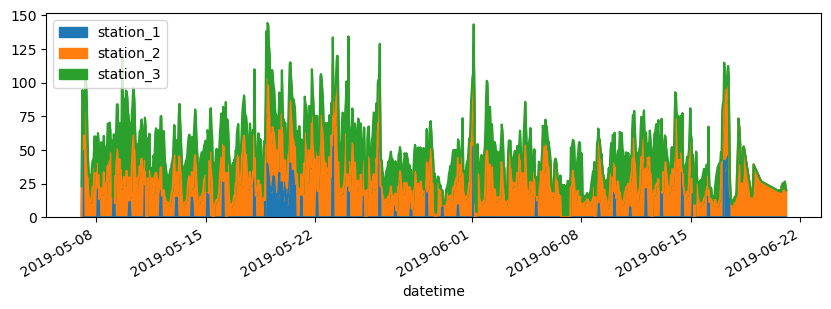

In [ ]:
aq.plot.area(figsize=(10,3))

* Gráfico de Cajas, utilizado para ubicar los percentiles y visualización de datos atípicos

<Axes: >

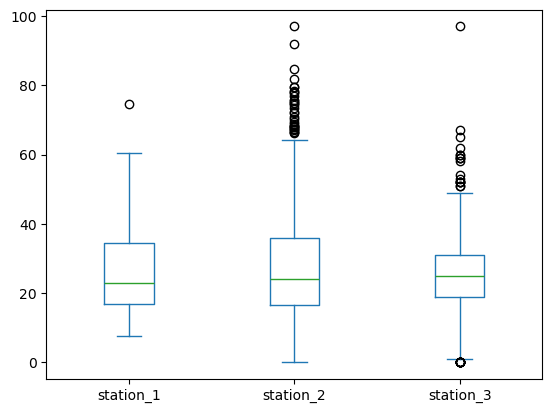

In [ ]:
aq.plot.box()

* Combinando el los promedios diarios y graficando en un grafico de cajas.

<Axes: >

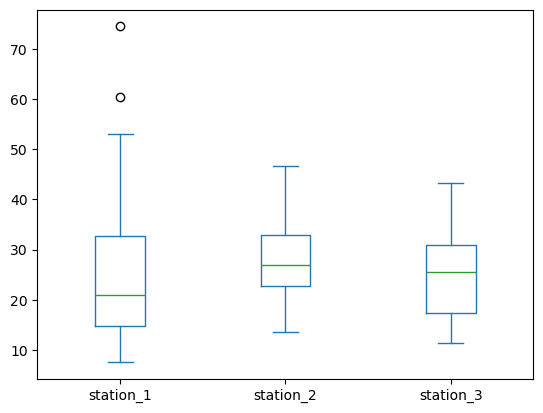

In [ ]:
aqd=aq.resample('d').mean()
aqd.plot.box()

* Un gráfico de correlación o diagrama de puntos utilizado para analizar el grado de correlación entre dos series, se grafica con la función .scatter('serie1','serie2')

<Axes: xlabel='station_2', ylabel='station_3'>

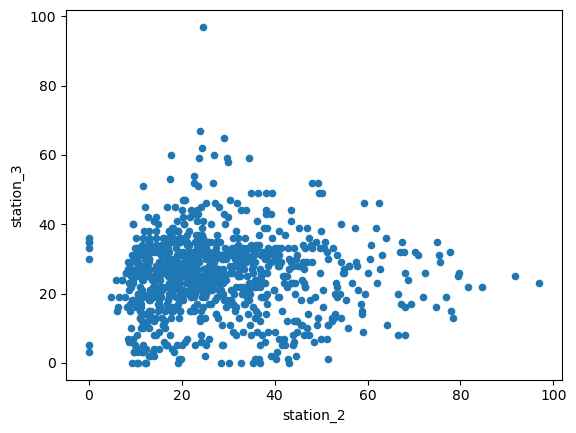

In [ ]:
aq.plot.scatter('station_2','station_3')

Para notar la superpoción de los puntos se utiliza el argumento de "alpha" y para cambiar el color, con "color" colocando el código RGB con el numeral, o el nombre del color.

<Axes: xlabel='station_2', ylabel='station_3'>

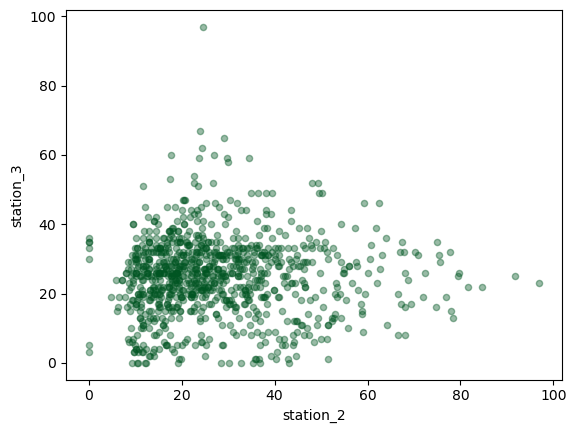

In [ ]:
aq.plot.scatter('station_2','station_3', alpha=0.4, color='#005522')